# D is for Decision Tree
> What is a decision tree and how do we implement it in Python?

- toc: false 
- badges: True
- comments: true
- categories: [D]
- hide: false
- image: images/d-is-for-decision-tree/decision_tree.png

## _What is a **Decision Tree**?_
**Decision Trees** are an algorithm used for either [classification](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/concepts/2020/05/24/c-is-for-classification.html) or regression tasks.  

## *How do they work?*  
While the math is [fairly complicated](https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906), the concept is incredibly straightforward:  
1. start with all observations in one group
2. identify a binary question, (i.e., *yes/no*, *over/under*) resulting in two groups which are as distinct from eachother as possible
3. repeat step two until every subgroup is homogeneous or some other metric has been achieved

## What are the advantages?  
**Transparency**: They are considered a [*white/glass box*](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm because you can see what decisions the algorithm made which leads to,   

**Interpretability**: Again, since you can see which decisions were made, it's easy to comprehend and explain the predictions. 

**Ease**: Data trees **DO NOT** require feature scaling or normalization{% fn 1 %}.  

## What are the disadvantages?  
**Overfitting**: Since they try to find the purest groups, they have a tendency to overfit.  

**Non-Linear Data**: Relationships in the data between features are not considered. 

## How do we train a decision tree? 

I'm a [task-based person](https://www.ef.com/wwen/blog/teacherzone/what-is-task-based-learning/) so let's set a problem.  

### Step 0: Frame the Problem  
*Can we determine who would have survived the Titanic?*   

### Step 1: Collect/Load our Data

Now let's get the data. 

In [1]:
import seaborn as sns
sns.set(palette="colorblind")
titanic = sns.load_dataset("titanic")

### Step 2: Inspect our Data
Do we have any missing values?  

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Yes we do.   

What are the data types?

In [3]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

We have a mix. 

Let's get a feel for the values by looking at the first five rows. 

In [4]:
titanic.head().T

,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22,38,26,35,35
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


Hmmm. Looks like `seaborn` has already done some feature engineering (i.e, `alone` is a combination of `sibsp` and `parch`).  
Much appreciated :smiley:

Now, since this is a toy dataset, I'm not going to do much EDA but, if you want to learn more, you can find some good examples of it [here](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/06/15/e-is-for-eda.html) and [here](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/07/06/e-is-for-eda.html).  

However, here is an obligatory bar chart of who survived.

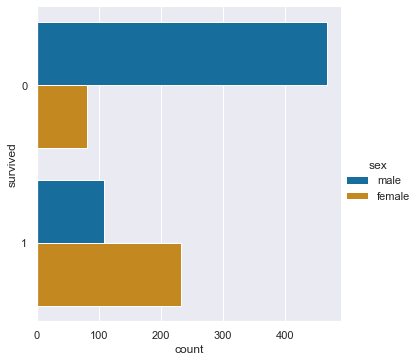

In [5]:
sns.catplot(y="survived", 
            hue="sex", 
            kind="count",
            data=titanic);

### Step 3: Prepare the data

In the interest of simplicity, I'm going to make a **REALLY** basic model by: 
1. dropping all features containing missing values

In [6]:
titanic = titanic.dropna(axis=1)

titanic.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.5+ KB


2. keeping only numerical features

In [7]:
titanic = titanic.select_dtypes(include=['float64', 'int64'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


Cool.  

Time to  make the train test split.

In [8]:
from sklearn.model_selection import train_test_split

x = titanic.iloc[:, 1:]
y = titanic.survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

and then

### Step 4: Fit the model 

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf = tree_clf.fit(x_train, y_train)

### Step 5: Evaluate the model

#### Visualzing the model

Earlier, I said it was easy to explain the decision the model made. 

"How?" you ask? By visualizing it: 

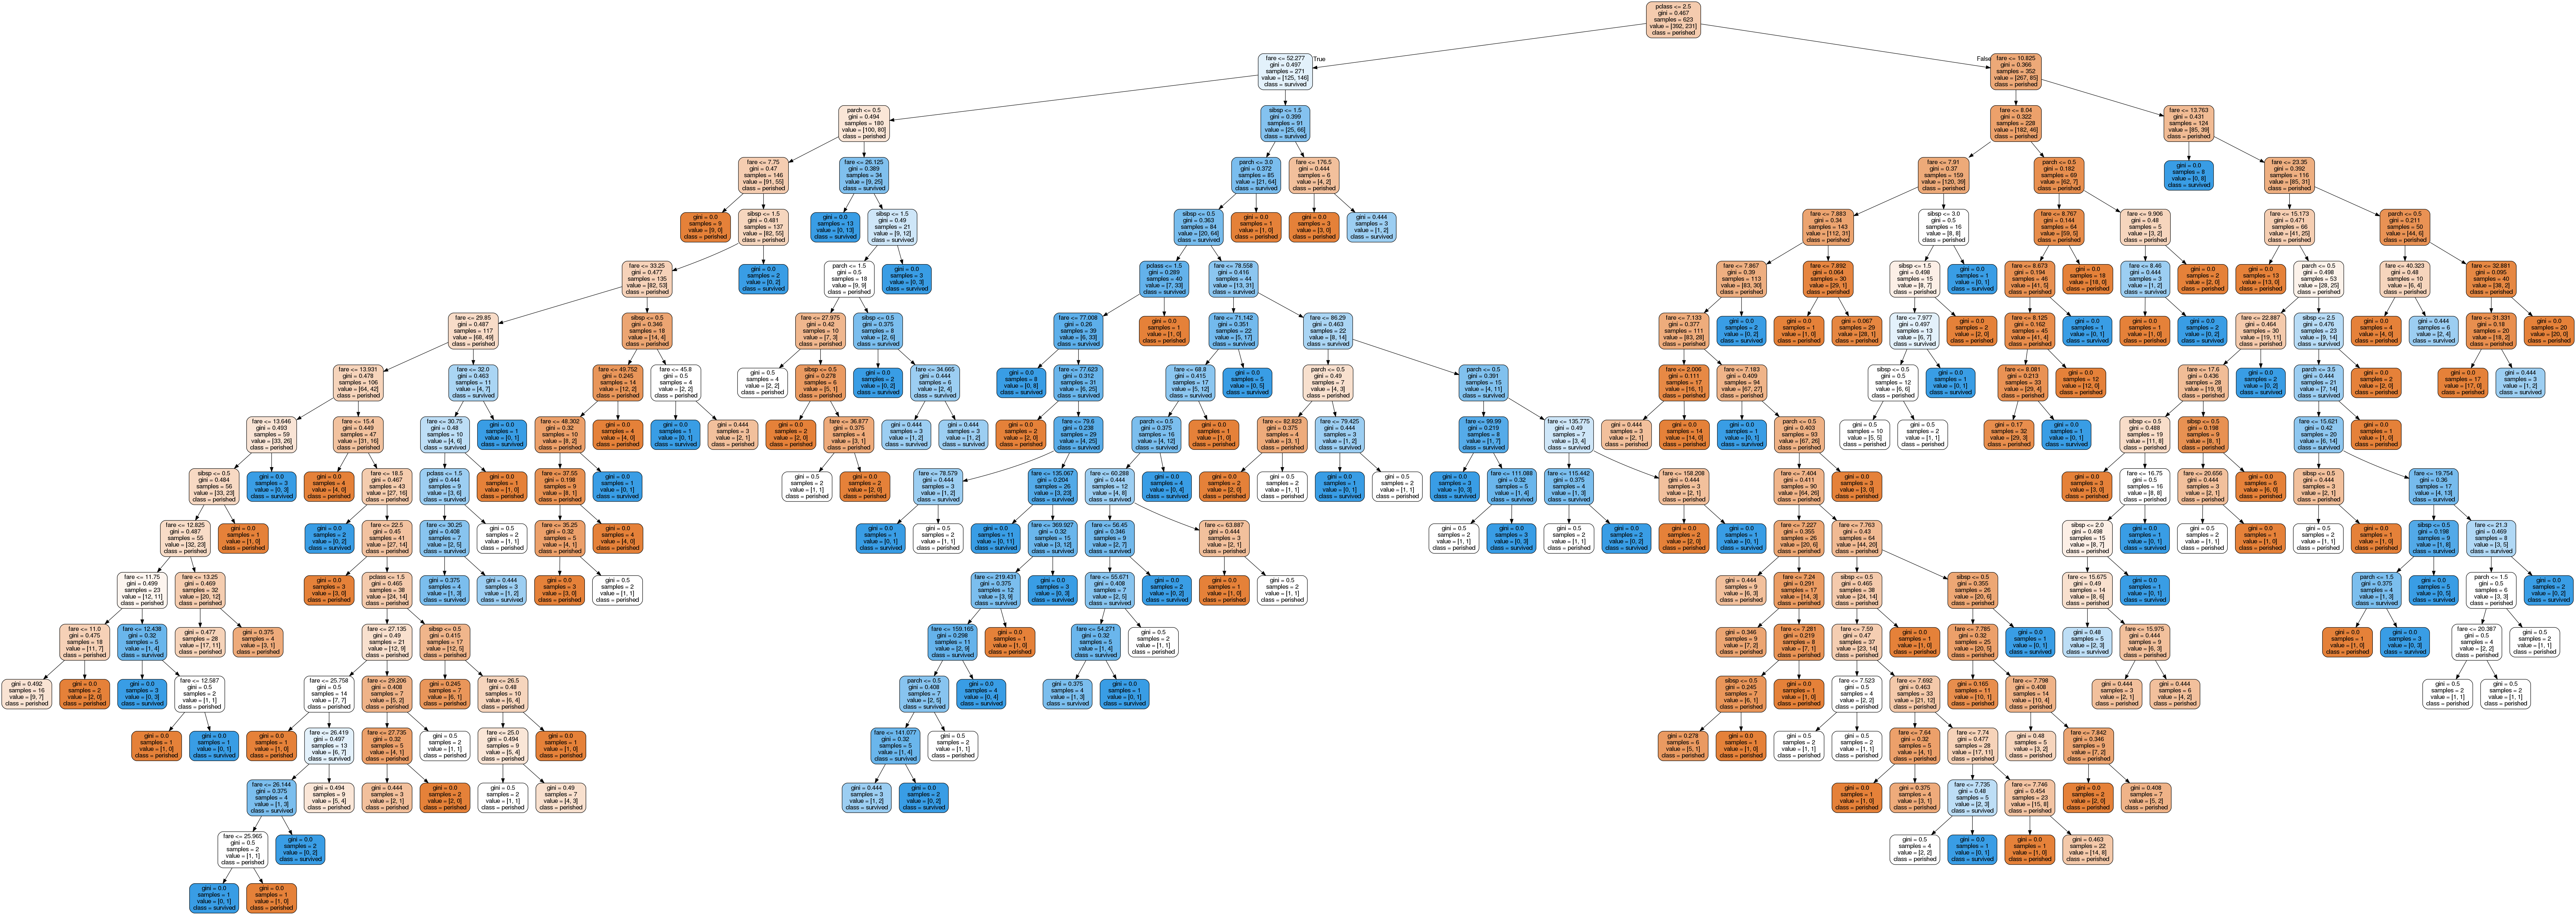

In [10]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=x_train.columns,
                            class_names=['perished', 'survived'],
                            rounded=True,
                            filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

That is a gigantic tree!!! In reality, we'd probably prune it by limiting the depth of the tree in an attempt to avoid [overfitting](https://www.investopedia.com/terms/o/overfitting.asp).  

But, let see how it performs. 

In [11]:
#Predict the response for test dataset
y_pred = tree_clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("The training accuracy of our model is %.2f." % (accuracy_score(y_train, tree_clf.predict(x_train))*100))
print("The test accuracy of our model is %.2f." % (accuracy_score(y_test, y_pred) *100))

The training accuracy of our model is 84.11.
The test accuracy of our model is 69.40.


Yep, definitely overfitting.  

So, let's prune our tree by limiting the `max_depth` to three:

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=3, 
                                  random_state=0)

retrain our model,

In [13]:
tree_clf = tree_clf.fit(x_train, y_train)

and visualize it one more time. 

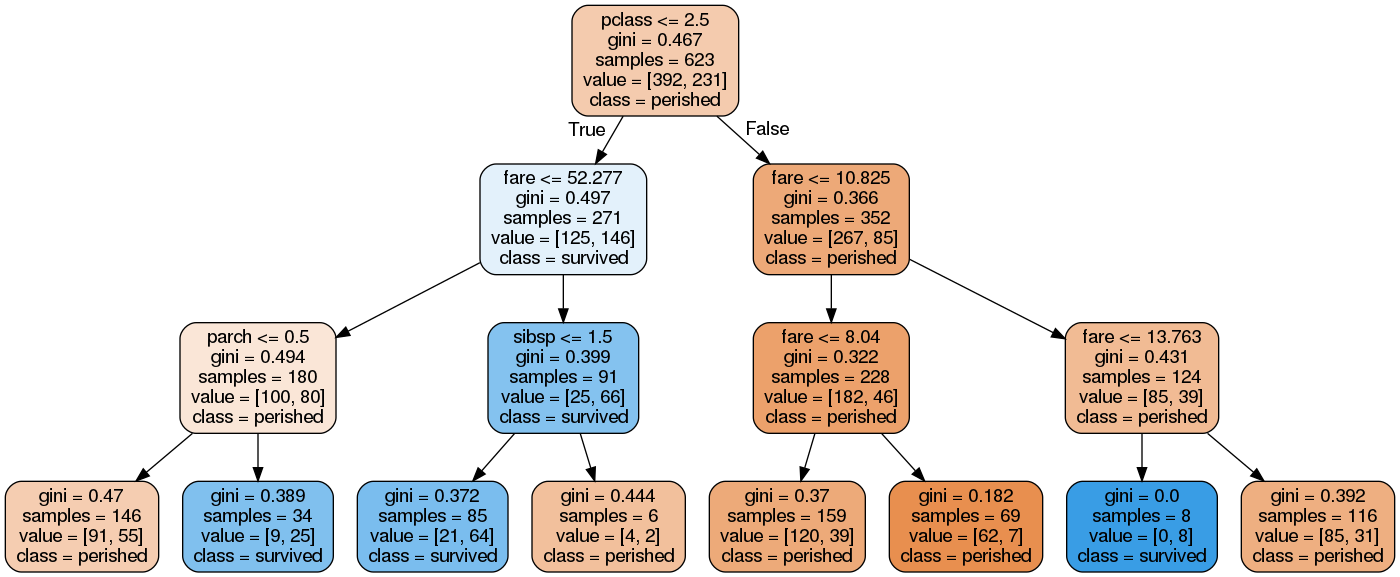

In [14]:
dot_data = export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=x_train.columns,
                            class_names=["perished", "survived"],
                            rounded=True,
                            filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

That is a much easier tree  to comprehend but does it perform better? 

In [15]:
#Predict the response for test dataset
y_pred = tree_clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("The training accuracy of our model is %.2f." % (accuracy_score(y_train, tree_clf.predict(x_train))*100))
print("The test accuracy of our model is %.2f." % (accuracy_score(y_test, y_pred) *100))

The training accuracy of our model is 73.68.
The test accuracy of our model is 71.64.


Indeed it does!  

Now imagine how much better it would perform if we added `gender` and `age` to the model.

## Summary

Decision trees are incredibly powerful because of their: 
- ease of use
- flexibility
- simplicity to understand

However, overfitting can be a real issue so, as with all algorithms, check the training accuracy and tune the hyperparameters as needed. 

Also, some of the splits defy common sense; for example, how can anyone have half a sibling or half a parent?{% fn 2 %}  

Therefore, while the trees maybe easy to interpret, they might not always be logical so, as always, we have to be prepared to defend what we've made. 

Happy coding! 

### Further Reading
[*Hands-On Machine Learning with Scikit-Learn and TensorFlow*: 'Chapter 6 Decision Trees'](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)  
[DataCamp Decision Tree Classifier Tutorial](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)  
[Understanding the Mathematics Behind Decision Trees](https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906)  
[Visualizing Decision Trees](https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/)  


### Footnotes
{{ 'Geron, 2019, Page 177' | fndetail: 1 }}  
{{ 'If anyone knows how to set the tree to only split on whole values, please write it in the comments below.' | fndetail: 2 }}  